# Capstone Project
## Image classifier for the SVHN dataset
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

# Import libraries and Data

In [ ]:
import tensorflow as tf
print("TF version:", tf.__version__)
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

TF version: 2.3.0


In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
# Run this cell to load the dataset || It's local path of system.

train = loadmat('/content/gdrive/My Drive/Colab Notebooks/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/Colab Notebooks/test_32x32.mat')

In [ ]:
# Key values inside .mat file
print("Train Keys :",train.keys())
print("Test Keys  :",test.keys())

Train Keys : dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
Test Keys  : dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

# Inspect and preprocess the dataset

* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.

In [ ]:
train_data = train['X']
train_label = train['y']
test_data = test['X']
test_label = test['y']

In [ ]:
train_data = train_data.astype('float64')
test_data = test_data.astype('float64')

train_label = train_label.astype('int64')
test_label = test_label.astype('int64')

In [ ]:
# Display shape
print("Train data shape :",train_data.shape)
print("Train label shape :",train_label.shape)
print("test data shape :",test_data.shape)
print("test label shape :",test_label.shape)

Train data shape : (32, 32, 3, 73257)
Train label shape : (73257, 1)
test data shape : (32, 32, 3, 26032)
test label shape : (26032, 1)


In [ ]:
# Reshape the data | Fix axis of images
reshape_train_data = np.moveaxis(train_data,-1,0)
reshape_test_data = np.moveaxis(test_data,-1,0)

In [ ]:
# Scale the dataset
scale_train_data = reshape_train_data/255.
scale_test_data = reshape_test_data/255.

In [ ]:
# Display shape
print("Train data shape :",scale_train_data.shape)
print("Train label shape :",train_label.shape)
print("test data shape :",scale_test_data.shape)
print("test label shape :",test_label.shape)

Train data shape : (73257, 32, 32, 3)
Train label shape : (73257, 1)
test data shape : (26032, 32, 32, 3)
test label shape : (26032, 1)


* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.

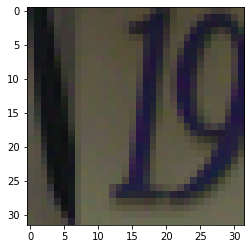

label : [1]


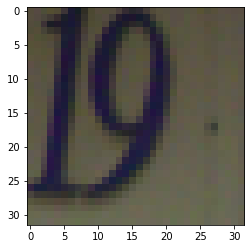

label : [9]


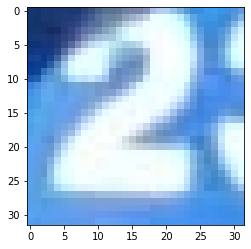

label : [2]


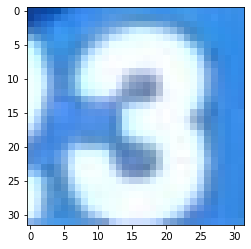

label : [3]


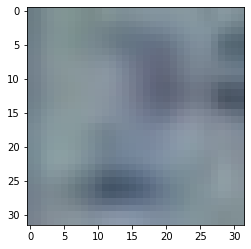

label : [2]


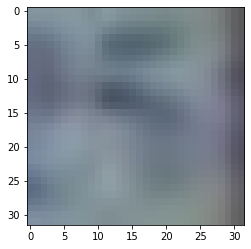

label : [5]


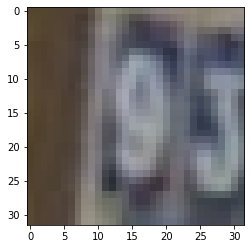

label : [9]


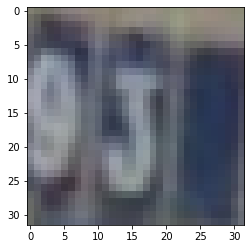

label : [3]


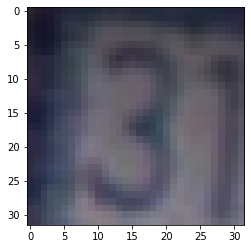

label : [3]


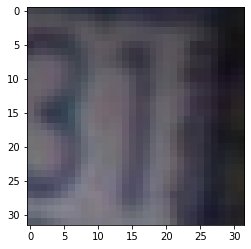

label : [1]


In [ ]:
for i in range(10):
    im = scale_train_data[i,:,:]
    plt.imshow(im)
    plt.show()
    print(f"label : {train_label[i]}")

* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._

In [ ]:
grey_train_data = tf.image.rgb_to_grayscale(scale_train_data)
grey_test_data = tf.image.rgb_to_grayscale(scale_test_data)
print("grey_train_data shape : ",grey_train_data.shape)
print("grey_test_data shape : ",grey_test_data.shape)

grey_train_data shape :  (73257, 32, 32, 1)
grey_test_data shape :  (26032, 32, 32, 1)


* Select a random sample of the grayscale images and corresponding labels from the dataset and display them in a figure.

label : [3]


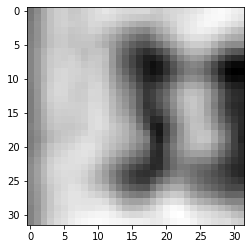

In [ ]:
i = 10
grey_img = tf.image.rgb_to_grayscale(scale_train_data[i])
_ = plt.imshow(grey_img[...,0], cmap='gray')
print(f"label : {train_label[i]}")

In [ ]:
# change labels to numbers
from keras.utils import to_categorical
To_train_label = to_categorical(train_label)
To_test_label = to_categorical(test_label)

In [ ]:
# Split train data into train and validation sets
from sklearn.model_selection import train_test_split
x_train,y_train,x_val,y_val = train_test_split(scale_train_data,To_train_label,test_size=0.15,random_state=22)

# MLP neural network classifier

* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output.
* _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._

In [ ]:
model = Sequential([
    Dense(units=128,activation='relu',input_shape=(32,32,3)),
    Dense(units=64,activation='relu'),
    Dense(units=64,activation='relu'),
    Flatten(),
    Dense(units=11,activation='softmax')
])

* Print out the model summary (using the summary() method)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 64)        8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32, 32, 64)        4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 11)                720907    
Total params: 733,835
Trainable params: 733,835
Non-trainable params: 0
_________________________________________________________________


* Compile and train the model (recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy','mean_absolute_error']
)

In [ ]:
# time taken : 30 min - 55 min (depends on data size)
history = model.fit(x_train,x_val,epochs=30,batch_size=40,validation_split=0.15)

Epoch 1/30
1324/1324 [==============================] - 12s 9ms/step - loss: 2.0410 - accuracy: 0.3189 - mean_absolute_error: 0.1492 - val_loss: 1.9280 - val_accuracy: 0.4128 - val_mean_absolute_error: 0.1413
Epoch 2/30
1324/1324 [==============================] - 12s 9ms/step - loss: 1.8821 - accuracy: 0.4103 - mean_absolute_error: 0.1392 - val_loss: 1.8981 - val_accuracy: 0.4155 - val_mean_absolute_error: 0.1381
Epoch 3/30
1324/1324 [==============================] - 13s 9ms/step - loss: 1.8409 - accuracy: 0.4248 - mean_absolute_error: 0.1366 - val_loss: 1.8731 - val_accuracy: 0.4215 - val_mean_absolute_error: 0.1367
Epoch 4/30
1324/1324 [==============================] - 12s 9ms/step - loss: 1.8160 - accuracy: 0.4333 - mean_absolute_error: 0.1350 - val_loss: 1.8901 - val_accuracy: 0.4232 - val_mean_absolute_error: 0.1356
Epoch 5/30
1324/1324 [==============================] - 12s 9ms/step - loss: 1.7922 - accuracy: 0.4451 - mean_absolute_error: 0.1334 - val_loss: 1.8693 - val_accura

* As a guide, our aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the validation .

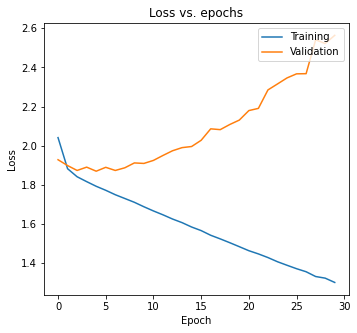

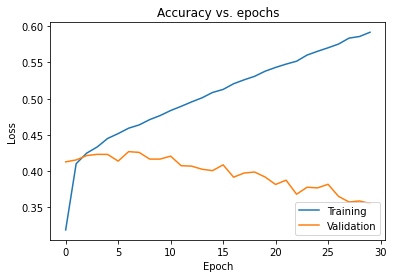

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)

# to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

fig.add_subplot(122)
# to plot the epoch vs accuracy graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

As we can observer the model working great on training dataset.but not good on validation dataset. Here we are facing `Overfitting.` 
To fix `overfitting` , need to apply regularization technique as well as need to modify our model to get best results.  

# CNN neural network classifier

* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.


In [ ]:
CNN_model = Sequential([
                        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
                        BatchNormalization(),
                        Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        MaxPooling2D(pool_size=(2,2)),
                        Dropout(0.3),
                        Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                        MaxPooling2D(pool_size=(2,2)),
                        Dropout(0.3),
                        Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                        BatchNormalization(),
                        Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                        MaxPooling2D(pool_size=(2,2)),
                        Dropout(0.3),
                        Flatten(),
                        Dense(units=128,activation='relu'),
                        Dense(units=128,activation='relu'),
                        Dense(units=11,activation='softmax')
])

In [ ]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)       

* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!


In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3, amsgrad=True)
CNN_model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Train model with checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
# Create Tensorflow checkpoint object
checkpoint_path = 'model_checkpoints/checkpoints'
checkpoint =ModelCheckpoint(filepath=checkpoint_path,
                            frequency = 'epoch',
                            save_weights_only = True,
                            verbose = 1)

In [ ]:
# time taken : 
history1 = CNN_model.fit(x_train,x_val,validation_data=(y_train, y_val),epochs=30,batch_size=20,validation_split=0.15,callbacks=[EarlyStopping(patience=8),checkpoint])

Epoch 1/30
2647/2647 [==============================] - ETA: 0s - loss: 0.8373 - accuracy: 0.7230
Epoch 00001: saving model to model_checkpoints/checkpoints
2647/2647 [==============================] - 14s 5ms/step - loss: 0.8373 - accuracy: 0.7230 - val_loss: 0.4342 - val_accuracy: 0.8677
Epoch 2/30
2641/2647 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8769
Epoch 00002: saving model to model_checkpoints/checkpoints
2647/2647 [==============================] - 13s 5ms/step - loss: 0.3965 - accuracy: 0.8769 - val_loss: 0.3732 - val_accuracy: 0.8822
Epoch 3/30
2647/2647 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.9002
Epoch 00003: saving model to model_checkpoints/checkpoints
2647/2647 [==============================] - 14s 5ms/step - loss: 0.3267 - accuracy: 0.9002 - val_loss: 0.4695 - val_accuracy: 0.8535
Epoch 4/30
2643/2647 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.9146
Epoch 00004: saving model to 

* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

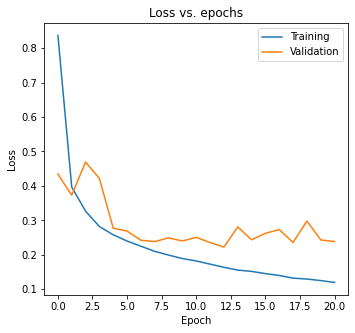

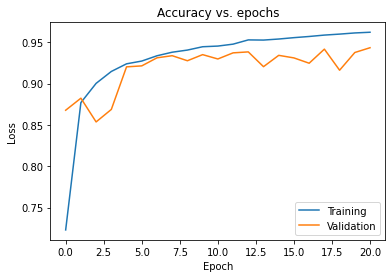

In [ ]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)

# to plot the epoch vs loss graph
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

fig.add_subplot(122)
# to plot the epoch vs accuracy graph

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
# Evaluate the model
def eve_mod(CNN_model, scale_test_data, To_test_label):
  test_loss, test_accuracy = CNN_model.evaluate(scale_test_data,To_test_label,verbose=2)
  return test_loss,test_accuracy

In [ ]:
test_loss, test_accuracy = eve_mod(CNN_model, scale_test_data, To_test_label)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

814/814 - 2s - loss: 0.2324 - accuracy: 0.9416
Test loss: 0.232426717877388
Test accuracy: 0.9415718913078308


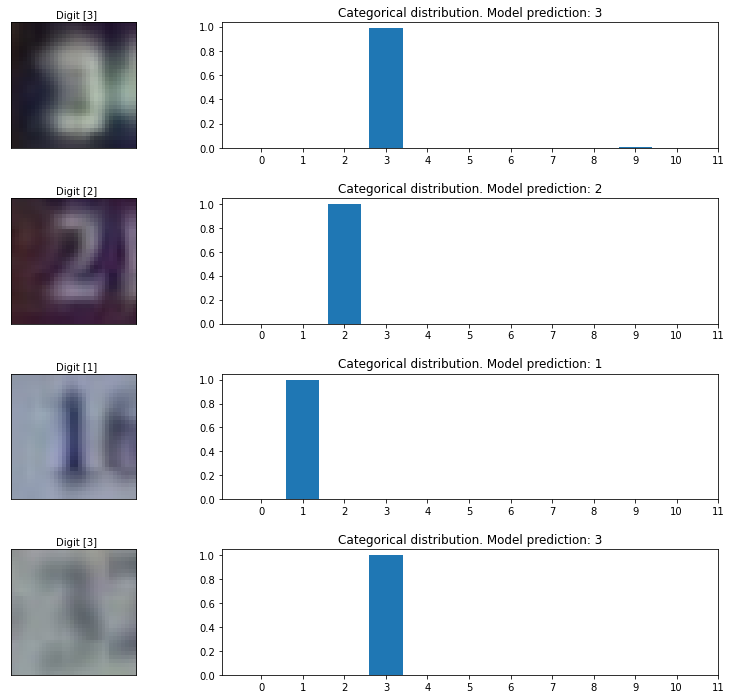

In [ ]:
# Model predictions
num_test_images = scale_test_data.shape[0]
 
random_inx = np.random.choice(num_test_images, 4)
random_test_images = scale_test_data[random_inx, ...]
random_test_labels = test_label[random_inx, ...]
 
predictions = CNN_model.predict(random_test_images)
 
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)
 
for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(11., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(12))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()